 We use CNNs to process text data to capture local features and patterns in the text sequences. Here's a step-by-step explanation:

Embedding Layer: This layer converts the input text sequences (word indices) into dense vectors of fixed size. The embedding layer helps in capturing the semantic meaning of the words.

Convolutional Layers: These layers apply convolution operations to the embedded text data. A convolution operation involves sliding a filter over the input text to extract local patterns (e.g., phrases or parts of sentences). Multiple filters can be used to capture different types of patterns.

Pooling Layers: These layers reduce the dimensionality of the data by taking the maximum or average value from each feature map created by the convolutional layers. Max pooling is commonly used to retain the most important features.

Global Max Pooling: This layer further reduces the output from the convolutional layers to a single vector by taking the maximum value from each feature map. This helps in flattening the data and preparing it for the fully connected layers.

Fully Connected (Dense) Layers: These layers are used for making predictions based on the features extracted by the convolutional and pooling layers. They can capture more complex patterns by learning non-linear combinations of the features.

Install TensorFlow: Ensure TensorFlow is installed.

Import Libraries: Import necessary libraries including numpy, pandas, TensorFlow, and matplotlib.

Load Dataset: Load the dataset from a CSV file.

Display Dataset: Display the first few rows of the dataset to understand its structure.

Ensure Strings: Convert all entries in the comment column to strings.

Preprocess Text Data: Tokenize the text data, convert it to sequences, and pad the sequences.

Prepare Labels: Extract labels from the DataFrame.

Split Data: Split the data into training and testing sets.

Build CNN Model: Construct a CNN model with embedding, convolution, pooling, and dense layers.

Compile Model: Compile the model using binary cross-entropy loss, the Adam optimizer, and accuracy as the metric.

Train Model: Train the model on the training data and validate it on the test data.

Plot Accuracy and Loss: Plot the training and validation accuracy and loss over the epochs.

Evaluate Model: Evaluate the model on the test data and print the test loss and accuracy.

,label,comment
0,1,need
1,0,might well milk last
2,1,ask locktrap
3,1,im glad community doesnt make console player f...
4,0,joke put stitch


Epoch 1/5
1626/1626 - 90s - 55ms/step - accuracy: 0.6412 - loss: 0.6264 - val_accuracy: 0.6628 - val_loss: 0.6065
Epoch 2/5
1626/1626 - 81s - 50ms/step - accuracy: 0.6836 - loss: 0.5886 - val_accuracy: 0.6640 - val_loss: 0.6065
Epoch 3/5
1626/1626 - 81s - 50ms/step - accuracy: 0.7081 - loss: 0.5585 - val_accuracy: 0.6617 - val_loss: 0.6118
Epoch 4/5
1626/1626 - 85s - 52ms/step - accuracy: 0.7391 - loss: 0.5136 - val_accuracy: 0.6477 - val_loss: 0.6501
Epoch 5/5
1626/1626 - 86s - 53ms/step - accuracy: 0.7765 - loss: 0.4541 - val_accuracy: 0.6426 - val_loss: 0.7299


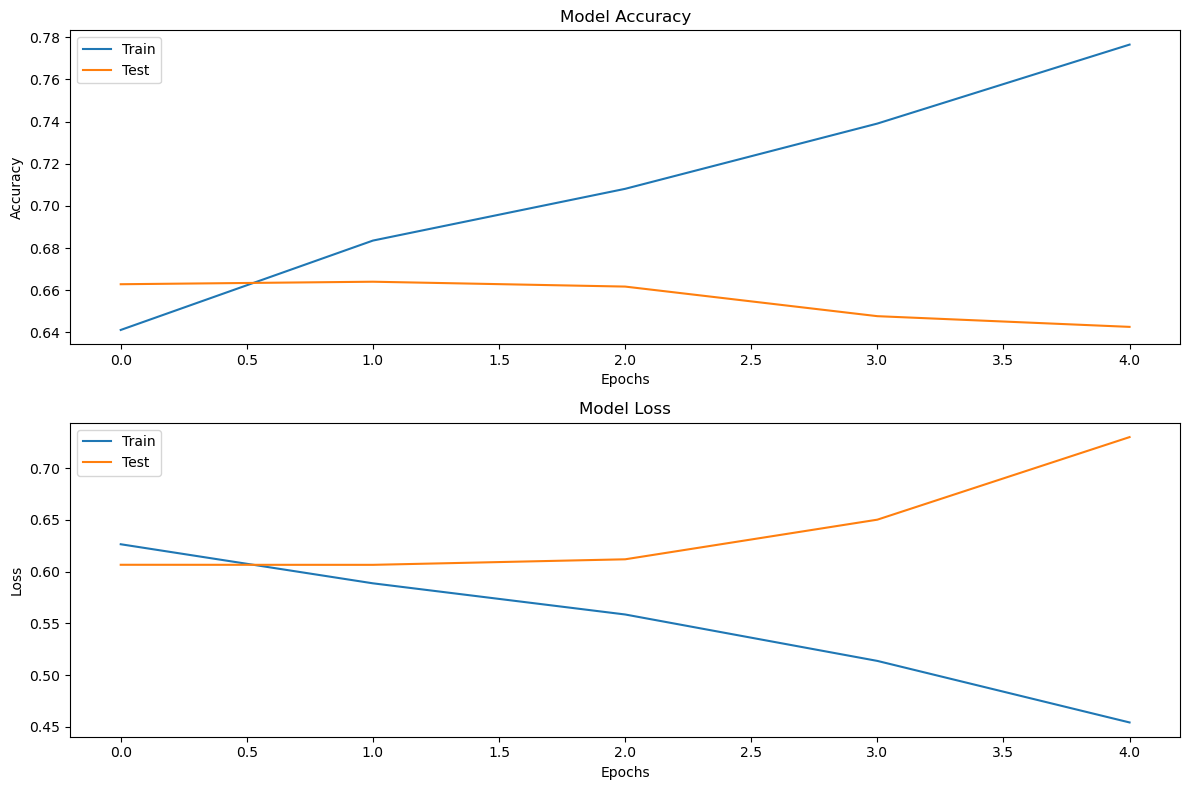

813/813 - 9s - 11ms/step - accuracy: 0.6426 - loss: 0.7299
Test Loss: 0.7298890948295593
Test Accuracy: 0.6426209211349487


In [1]:
# Install TensorFlow if not already installed
!pip install tensorflow

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
import matplotlib.pyplot as plt

# Magic inline for displaying plots inline
%matplotlib inline

# Load the dataset
file_path = 'cleaned_balanced_dataset_FINAL.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
display(data.head())

# Ensure all comments are strings
data['comment'] = data['comment'].astype(str)

# Preprocess the text data
max_features = 2000
max_len = 100

tokenizer = Tokenizer(num_words=max_features, oov_token='<OOV>')
tokenizer.fit_on_texts(data['comment'])
sequences = tokenizer.texts_to_sequences(data['comment'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Preparing the labels
labels = data['label'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Building the CNN model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Plotting the accuracy and loss graph
fig, axs = plt.subplots(2, figsize=(12, 8))

# Plotting the accuracy graph
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plotting the loss graph
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
